In [20]:
import pandas as pd
df = pd.read_csv('Brain Tumor.csv')
print(df)

          Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0        Image1      0   6.535339   619.587845           24.891522  0.109059   
1        Image2      0   8.749969   805.957634           28.389393  0.266538   
2        Image3      1   7.341095  1143.808219           33.820234  0.001467   
3        Image4      1   5.958145   959.711985           30.979219  0.001477   
4        Image5      0   7.315231   729.540579           27.010009  0.146761   
...         ...    ...        ...          ...                 ...       ...   
3757  Image3758      0  21.234512  1208.850174           34.768523  0.063774   
3758  Image3759      0  20.435349  1227.151440           35.030721  0.066763   
3759  Image3760      0  18.011520  1151.582765           33.934978  0.068396   
3760  Image3761      0  13.330429   945.732779           30.752769  0.087872   
3761  Image3762      0   6.110138   480.884025           21.929068  0.118171   

      Skewness   Kurtosis    Contrast  

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [22]:
data = pd.DataFrame(pd.read_csv('Brain Tumor.csv'))

Class
0    2079
1    1683
Name: count, dtype: int64


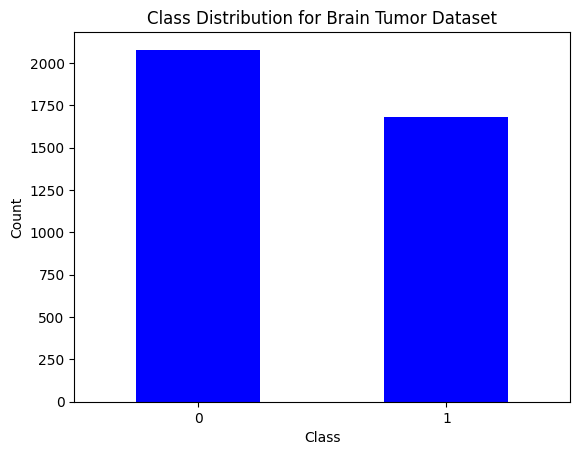

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Brain Tumor.csv')
class_counts = df['Class'].value_counts()
print(class_counts)
class_counts.plot(kind='bar', color=['blue', 'blue'])
plt.title('Class Distribution for Brain Tumor Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Target
1    1449
0     195
Name: count, dtype: int64


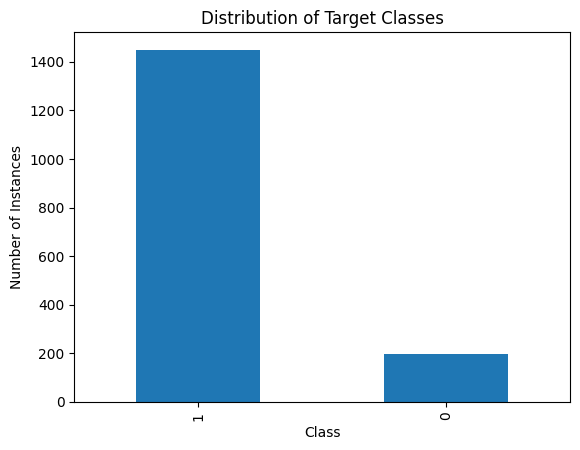

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bt_dataset_t3.csv')
class_counts = df['Target'].value_counts()
print(class_counts)
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Distribution of Target Classes')
plt.show()

In [28]:
from sklearn.utils import resample
import pandas as pd
df = pd.read_csv('Brain Tumor.csv')
df_major = df[df['Class'] == 0]
df_minor = df[df['Class'] == 1]
df_minor_sample = resample(df_minor, replace=True, n_samples=len(df_major), random_state=42)
data_balanced = pd.concat([df_major, df_minor_sample])
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print(data_balanced['Class'].value_counts())

Class
0    2079
1    2079
Name: count, dtype: int64


In [29]:
data.shape

(3762, 15)

In [31]:
data.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

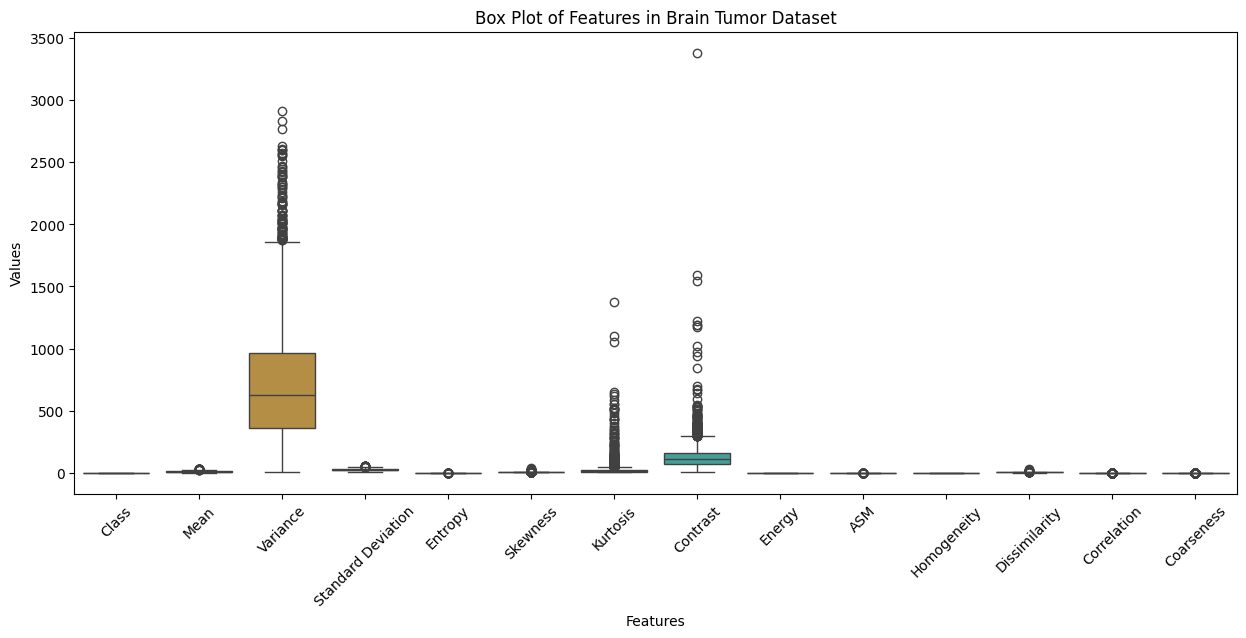

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('Brain Tumor.csv')
plt.figure(figsize=(15, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plot of Features in Brain Tumor Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


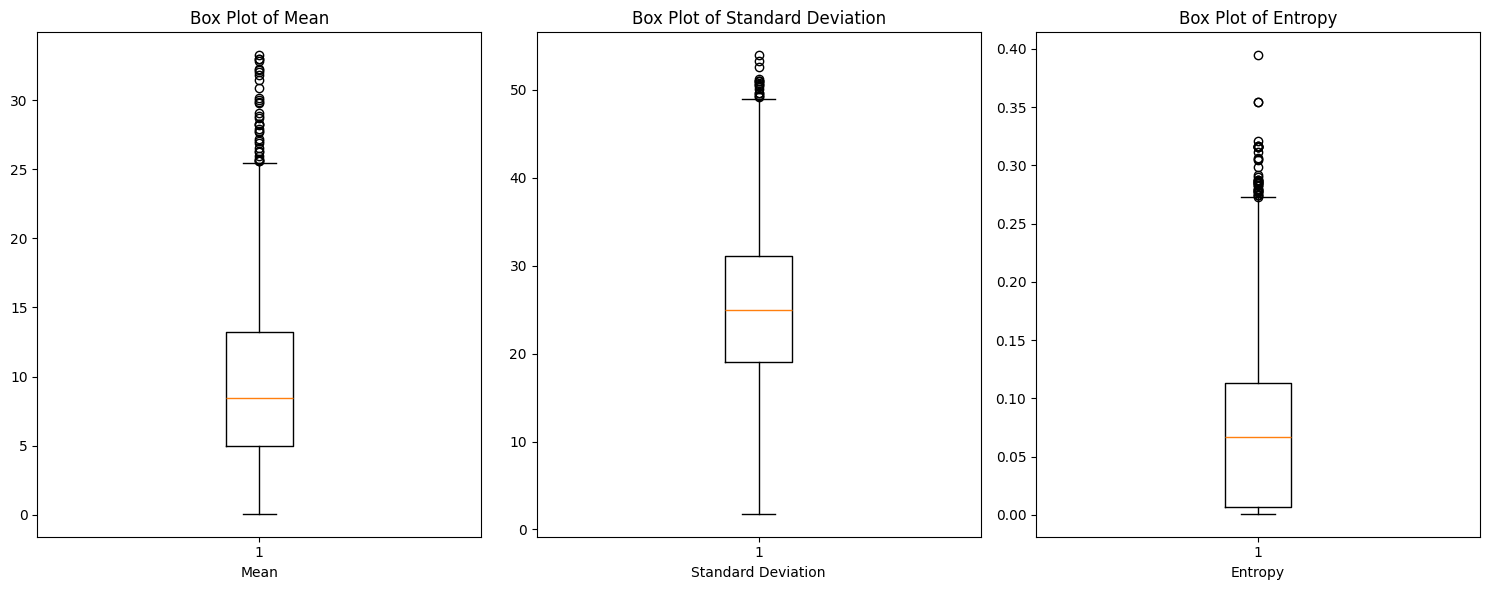

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Brain Tumor.csv')

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.xlabel('Mean')
plt.boxplot(data['Mean'])
plt.title('Box Plot of Mean')

plt.subplot(1, 3, 2)
plt.xlabel('Standard Deviation')
plt.boxplot(data['Standard Deviation'])
plt.title('Box Plot of Standard Deviation')

plt.subplot(1, 3, 3)
plt.xlabel('Entropy')
plt.boxplot(data['Entropy'])
plt.title('Box Plot of Entropy')

plt.tight_layout()
plt.show()


In [35]:
data_X = data.drop(['Class'], axis=1)
data_Y = data['Class']


In [36]:
data_X

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [37]:
data_Y.unique()

array([0, 1])

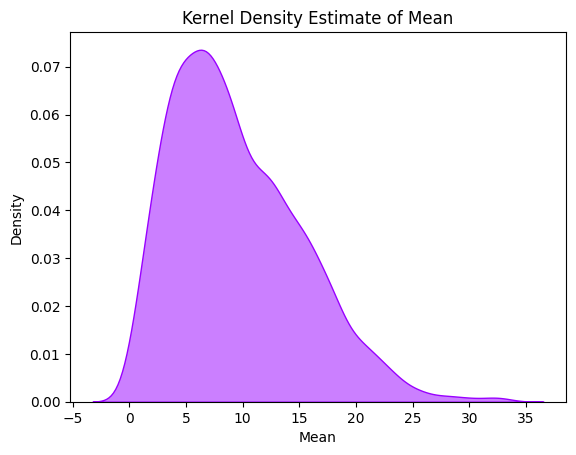

In [38]:
sns.kdeplot(data['Mean'], color='#9900ff', fill=True, alpha=0.5)
plt.title('Kernel Density Estimate of Mean')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y.values.ravel(), test_size=0.3, random_state=42)

### Training the model using RandomForest Classifier

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('Brain Tumor.csv')

data_X = data.drop(['Class'], axis=1)
data_Y = data['Class']

# Convert non-numeric columns to numeric or drop them
data_X = data_X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y.values.ravel(), test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

data = pd.read_csv('Brain Tumor.csv')

data_X = data.drop(['Class'], axis=1)
data_Y = data['Class']
data_X = data_X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y.values.ravel(), test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9875996457041629


### Testing the model

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
pre_dict = {'accuracy': accuracy}
print("Accuracy:", accuracy)

Accuracy: 0.9867139061116031


### Training the model using k-NN Classifier

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.983170947741364


In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pre_dict = {}

for i in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train+++++++++)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    pre_dict[i] = accuracy

print(pre_dict)

{1: 0.9867139061116031, 3: 0.9858281665190434, 5: 0.983170947741364, 7: 0.983170947741364, 9: 0.9822852081488043}


### Accuracy vs Number of Neighbours

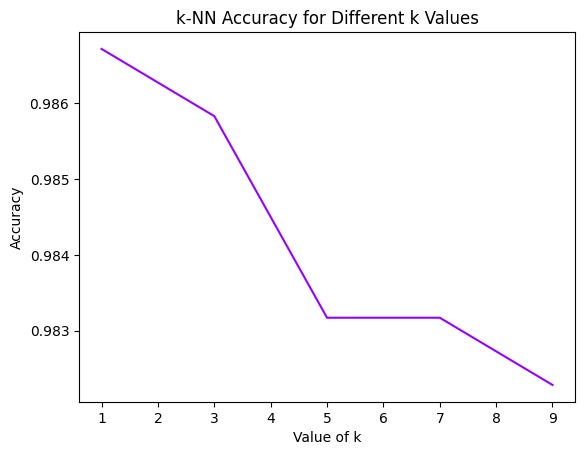

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=list(pre_dict.keys()), y=list(pre_dict.values()), color='#9900ff')

plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different k Values')
plt.show()


In [47]:
for key, value in pre_dict.items():
    if value == max(pre_dict.values()):
        k = key
        print("Best k value:", key)


Best k value: 1


In [49]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Accuracy with k =", k, ":", accuracy)


Final Accuracy with k = 1 : 0.9867139061116031


### Confusion Matrix

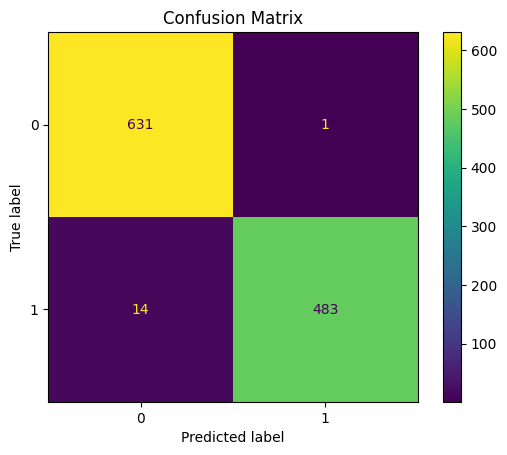

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


### SVC 

In [54]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.983170947741364

### SVM

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9849424269264836


### Logistic Regression

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (float): {accuracy:.2f}')

Accuracy (float): 0.98


KNN Accuracy: 0.98
Random Forest Accuracy: 0.99
SVM Accuracy: 0.98
Logistic Regression Accuracy: 0.98


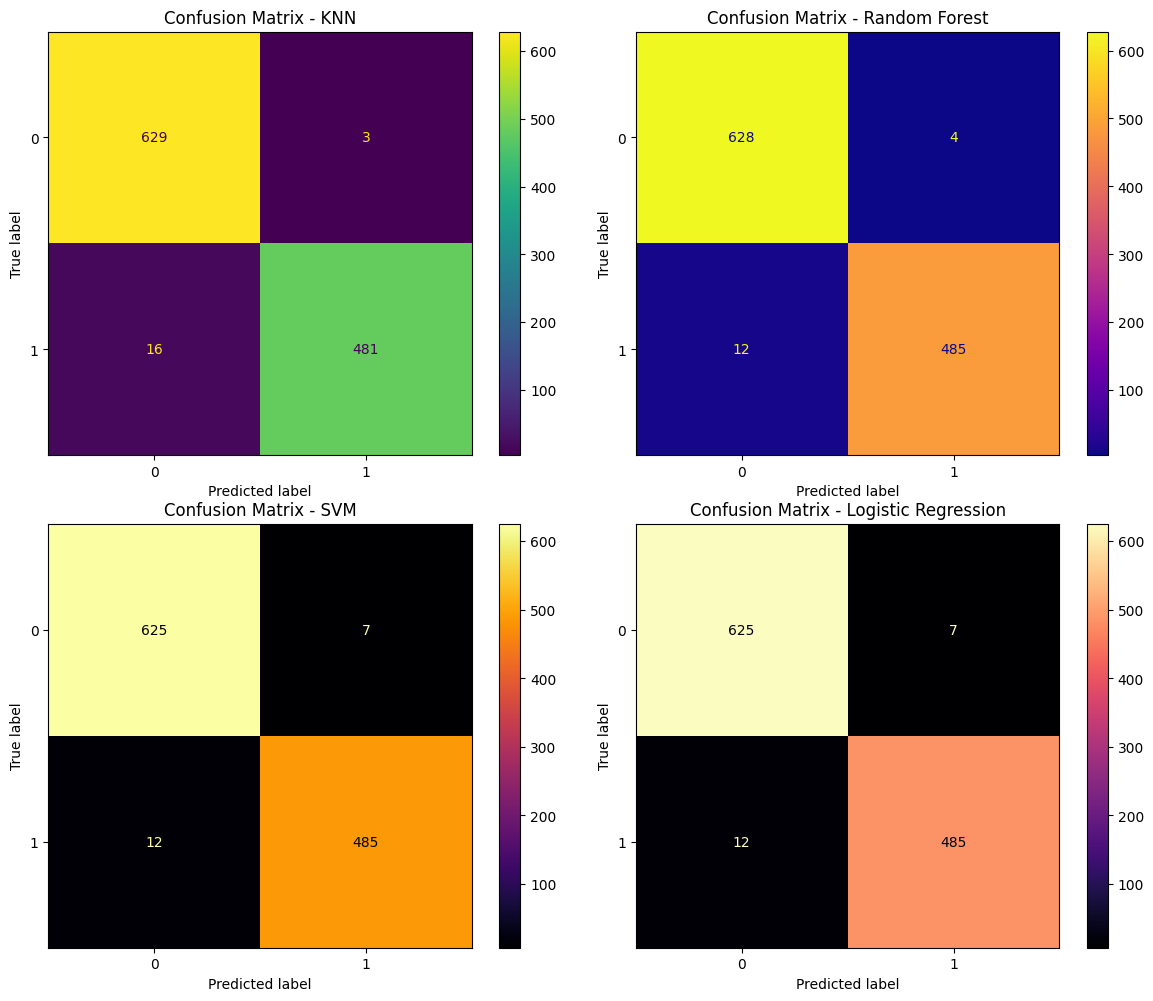

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv('Brain Tumor.csv')

# Prepare the data
data_X = data.drop(['Class'], axis=1).select_dtypes(include=['float64', 'int64'])
data_Y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y.values.ravel(), test_size=0.3, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model definitions
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": svm.SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Colormap definitions
colormaps = ['viridis', 'plasma', 'inferno', 'magma']

# Fit models and display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(models.items()):
    if model_name in ["KNN", "SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[idx], cmap=colormaps[idx])
    axes[idx].set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()


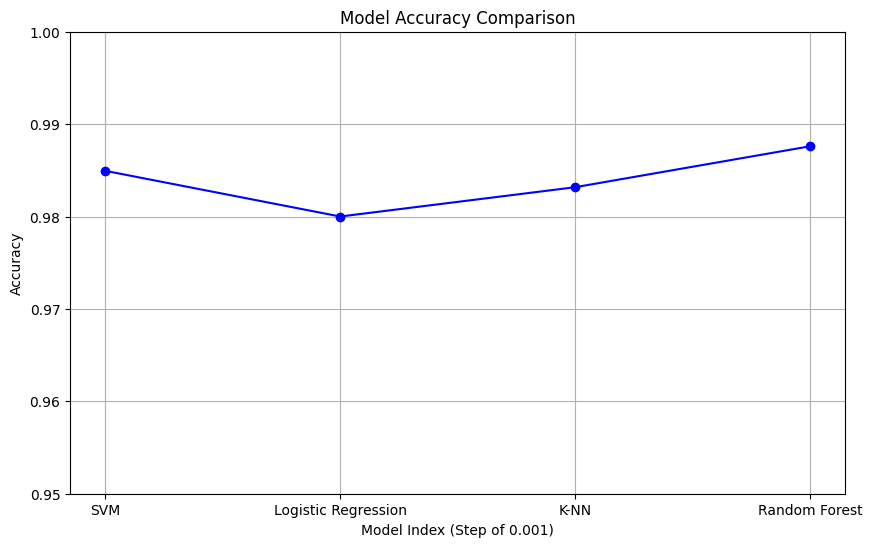

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracies
models = ['SVM', 'Logistic Regression', 'K-NN', 'Random Forest']
accuracies = [
    0.9849424269264836,  # SVM
    0.98,                # Logistic Regression
    0.983170947741364,   # K-NN
    0.9875996457041629   # Random Forest
]

# Generate x values starting from 0 with a step of 0.001
x_values = np.arange(0, len(models) * 0.001, 0.001)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model Index (Step of 0.001)')
plt.ylabel('Accuracy')
plt.xticks(x_values, models)  # Set x-ticks to model names
plt.ylim(0.95, 1.0)  # Set y-axis limits to focus on accuracy range
plt.grid()
plt.show()
